In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Navneet\Downloads\Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int')

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape

(8000, 11)

In [18]:
scaler=StandardScaler()

In [19]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]], shape=(8000, 11))

In [21]:
X_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]],
      shape=(2000, 11))

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [54]:
model=Sequential()

# model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(1,activation='sigmoid'))

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Navneet\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# model.compile(loss='binary_crossentropy',optimizer='Adam')
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
# plot a graph to fit model
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7387 - loss: 0.5650 - val_accuracy: 0.7994 - val_loss: 0.4667
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.4454 - val_accuracy: 0.8200 - val_loss: 0.4179
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.4147 - val_accuracy: 0.8275 - val_loss: 0.3988
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8342 - loss: 0.3954 - val_accuracy: 0.8388 - val_loss: 0.3849
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8419 - loss: 0.3802 - val_accuracy: 0.8419 - val_loss: 0.3756
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3686 - val_accuracy: 0.8487 - val_loss: 0.3685
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8508 - loss: 0.3604 - val_accuracy: 0.8506 - val_loss: 0.3632
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3546 - val_accu

In [58]:
model.layers[0].get_weights()

[array([[-0.01100498, -0.00488782,  0.14706445,  0.20939903, -0.00587448,
         -0.06184883,  0.03579517, -0.07546214,  0.304731  , -0.21366598,
         -0.2687889 ],
        [ 1.3990958 ,  0.02705879, -0.30228606,  0.40389788,  0.19024903,
         -0.32959285, -0.9319544 ,  0.0030621 , -0.01485296, -0.5316563 ,
         -0.3798621 ],
        [-0.12700944, -0.08119501, -0.40995482, -0.10089869, -0.02514641,
          0.04852138, -0.40281063,  0.00308987,  0.14344455,  0.04588919,
          0.3884933 ],
        [ 0.06028638,  0.5675454 ,  0.64985067,  0.07764824, -0.565444  ,
         -0.40907556,  0.26666626, -0.38073146, -0.17939247, -0.3367774 ,
          0.05457195],
        [-0.0811057 ,  1.3328583 , -0.5341546 , -0.3087479 , -1.0313396 ,
          0.41517922,  0.32490012, -0.48406523, -0.26887003, -0.03353457,
         -0.40089864],
        [ 0.00383527, -0.12672733,  0.04724381,  0.1872729 , -0.20523311,
          0.02943156, -0.54878646,  0.3286729 , -0.10478777,  0.1583452

In [59]:
model.layers[1].get_weights()

[array([[-1.09934664e+00,  5.25213778e-01,  6.94210827e-01,
          3.60757679e-01, -7.05659837e-02,  3.95609140e-01,
          4.22821283e-01, -7.92763650e-01,  2.58825690e-01,
         -1.04173899e+00, -5.61408140e-03],
        [ 1.11609466e-01, -1.79906815e-01, -2.01975226e-01,
          1.79432854e-01,  2.55203813e-01, -4.16271865e-01,
          4.74830329e-01,  3.06923300e-01,  1.40223670e+00,
         -6.46369234e-02, -1.55663502e+00],
        [ 3.81699055e-01, -1.65777981e-01, -3.46976489e-01,
         -1.37130424e-01,  4.93645638e-01, -3.18407446e-01,
         -1.75634548e-02,  3.25467706e-01, -8.19964647e-01,
          3.49043846e-01,  3.98052633e-01],
        [ 1.95134029e-01,  3.47980618e-01, -1.03214242e-01,
          3.69256765e-01,  2.55196810e-01,  3.67967606e-01,
         -1.39804089e+00,  4.17009175e-01, -1.01846337e+00,
          1.19796716e-01, -1.13538039e+00],
        [-6.66195974e-02, -4.30478245e-01,  4.85845029e-01,
         -2.32301459e-01,  4.24518675e-01, -

In [60]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [61]:
y_pred=np.where(y_log>0.5,1,0)

In [62]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], shape=(2000, 1))

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_pred,y_test)

0.8625

In [65]:
import matplotlib.pyplot as plt

In [67]:
history.history

{'accuracy': [0.7387499809265137,
  0.8053125143051147,
  0.8262500166893005,
  0.8342187404632568,
  0.8418750166893005,
  0.8475000262260437,
  0.850781261920929,
  0.8545312285423279,
  0.8565624952316284,
  0.8560937643051147,
  0.8584374785423279,
  0.8581249713897705,
  0.8617187738418579,
  0.8604687452316284,
  0.8618749976158142,
  0.8614062666893005,
  0.8620312213897705,
  0.8614062666893005,
  0.8626562356948853,
  0.8623437285423279,
  0.862500011920929,
  0.8626562356948853,
  0.8626562356948853,
  0.8634374737739563,
  0.8626562356948853,
  0.8646875023841858,
  0.8639062643051147,
  0.8620312213897705,
  0.86328125,
  0.8642187714576721,
  0.8643749952316284,
  0.8628125190734863,
  0.8617187738418579,
  0.8634374737739563,
  0.8634374737739563,
  0.8615624904632568,
  0.8637499809265137,
  0.8634374737739563,
  0.8629687428474426,
  0.8639062643051147,
  0.8665624856948853,
  0.8648437261581421,
  0.8639062643051147,
  0.862500011920929,
  0.86328125,
  0.8657812476158

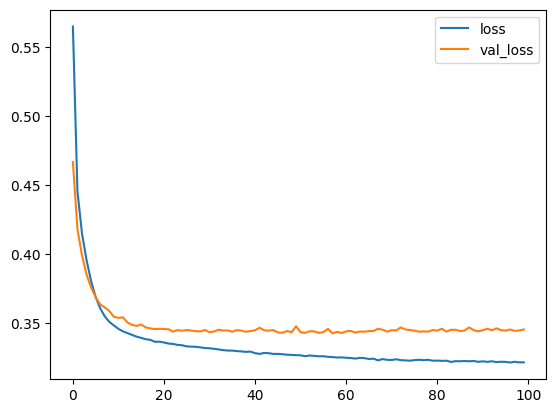

In [70]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

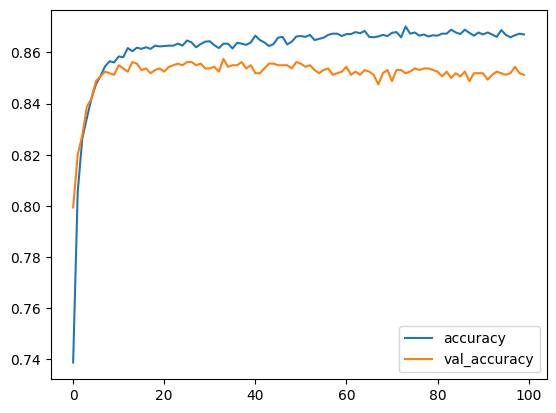

In [73]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()